In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import random

In [19]:
df_train = pd.read_csv("train.csv")
df_train.head()
# There are 784 features, each representing a pixel of an image that is represented by a row.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


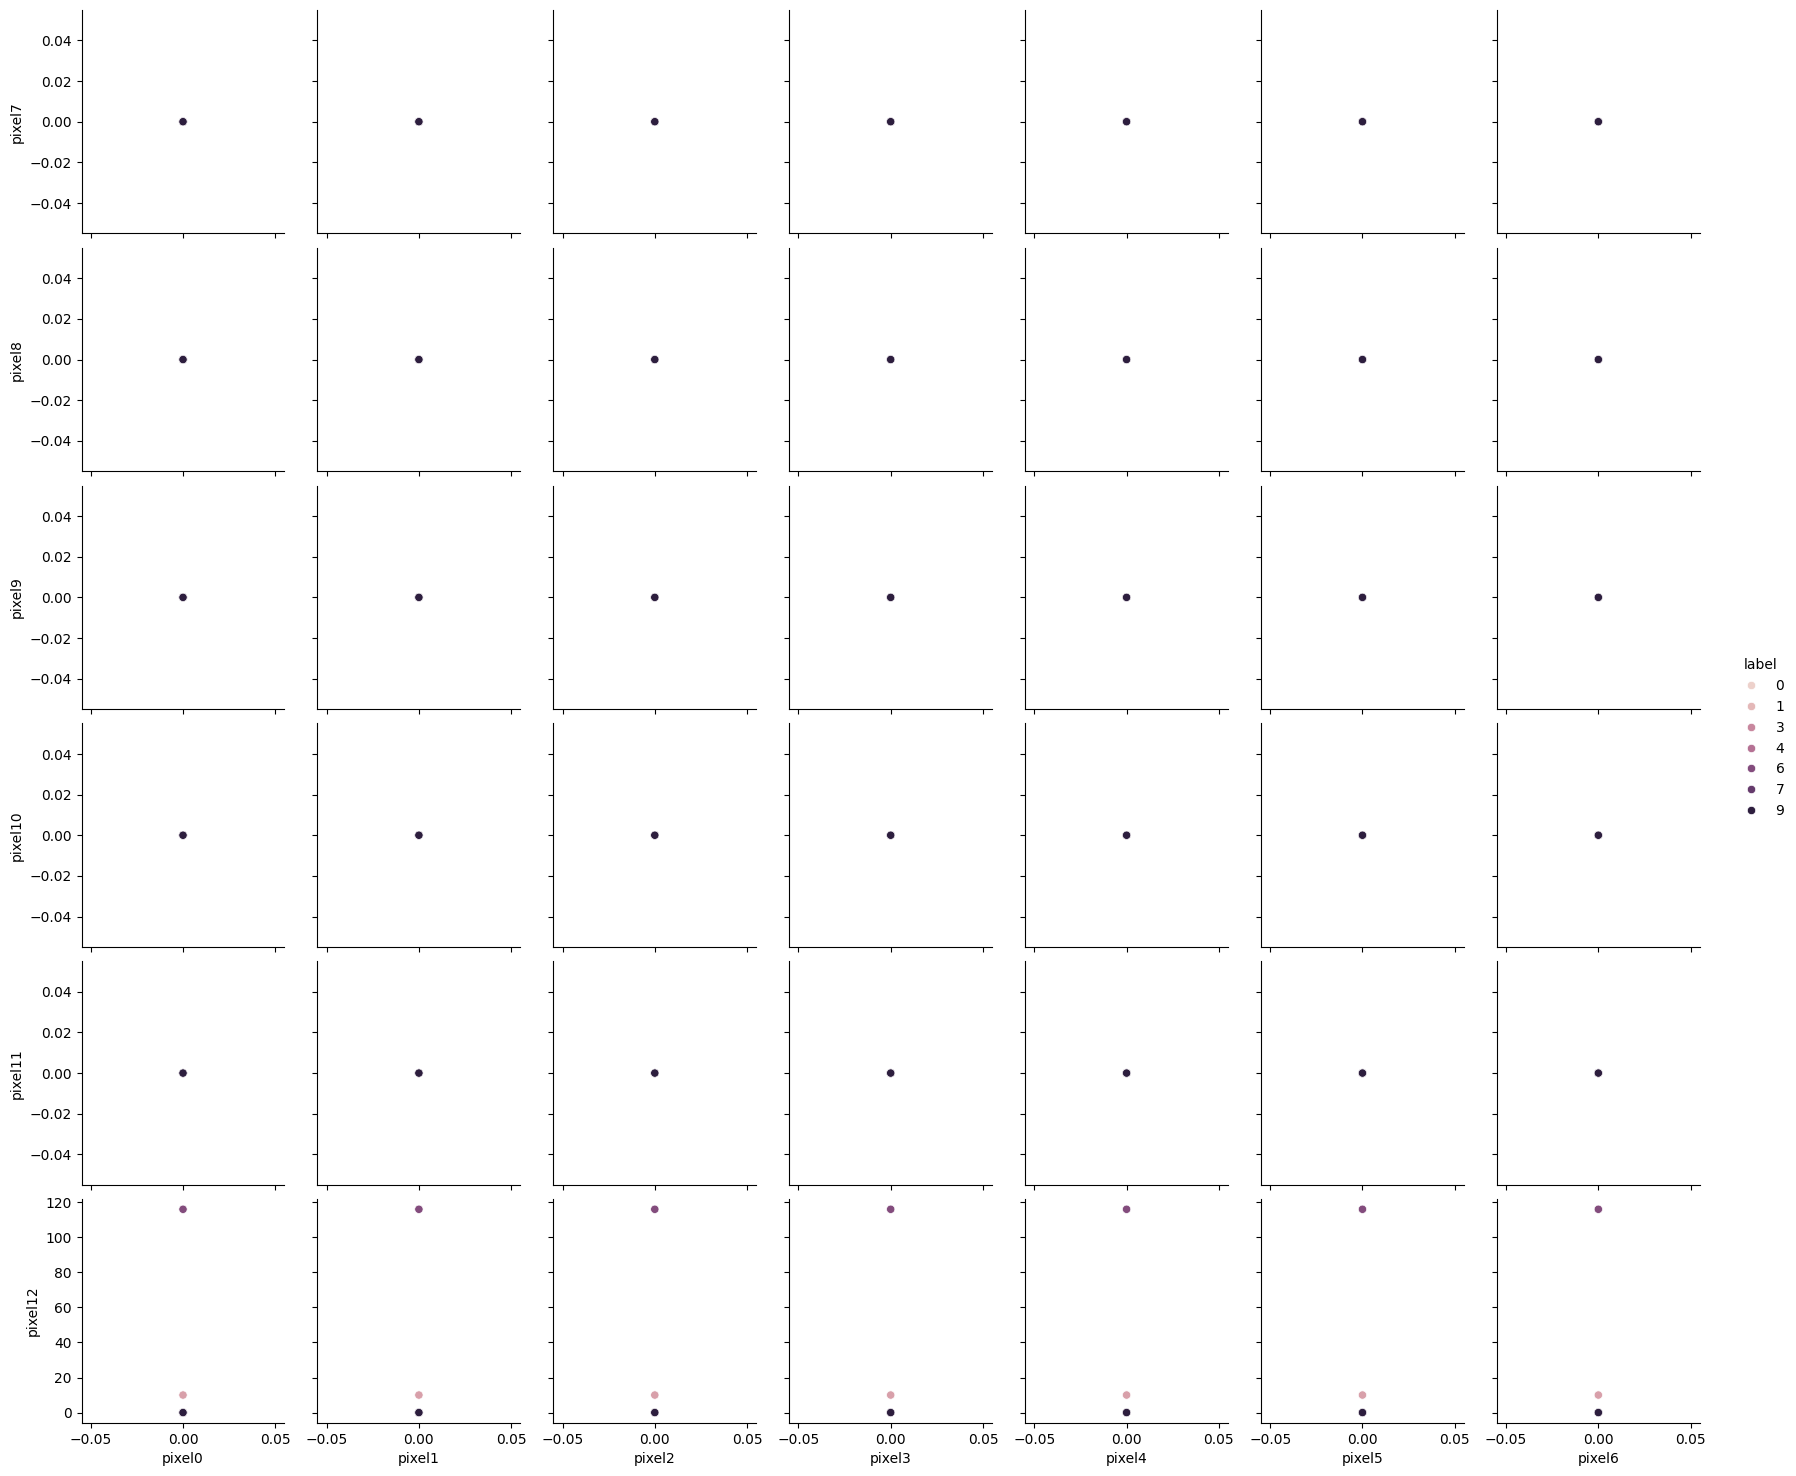

In [34]:
# It is clear that the dataset is not linearly separable and so, we can't employ a linear kernel and must transform input data to higher-dimensional space. 
# This is done using kernel trick when we invoke SVC() from the sklearn library with a non-linear kernel
sns.pairplot(df_train, x_vars=['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6'], y_vars=['pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12'], hue='label')

In [22]:
# Segregating the dataset into features and label.
X = df_train.drop('label', axis=1)
X = X.values
y = df_train['label']
y = y.values

In [23]:
# Making the testing set slightly smaller than usual as there are a large number of rows.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [24]:
# Normalizing the data is important when we use svm to avoid giving unintentional priority to a feature owing to increased avg value
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Using default values for c, gamma and the default 'rbf' kernel
model = SVC()
model.fit(X_train, y_train)

SVC()

In [26]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9602380952380952


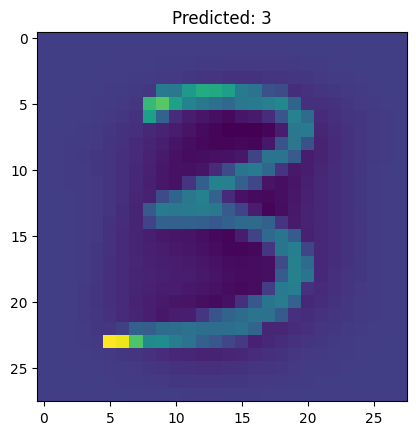

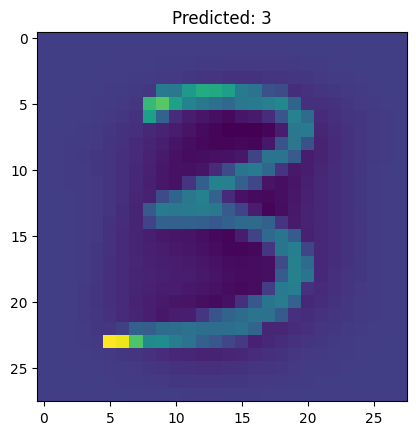

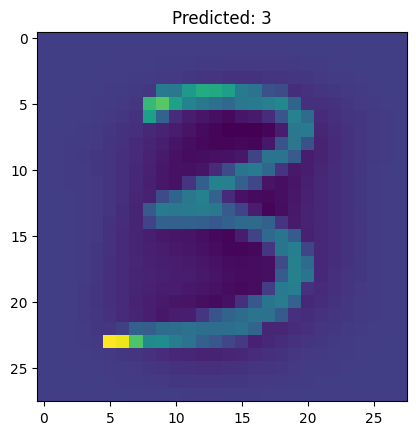

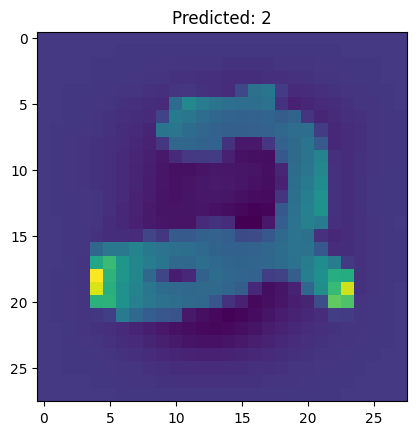

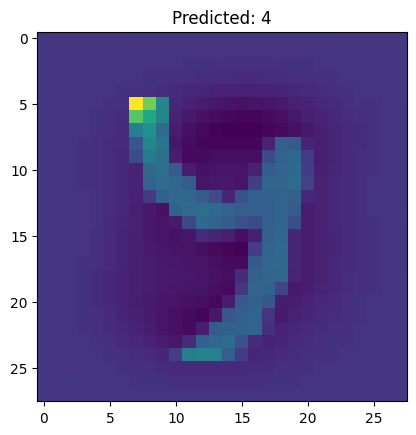

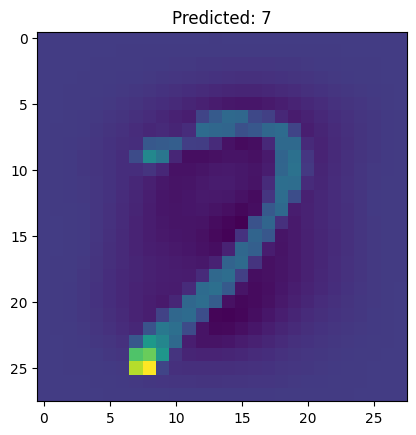

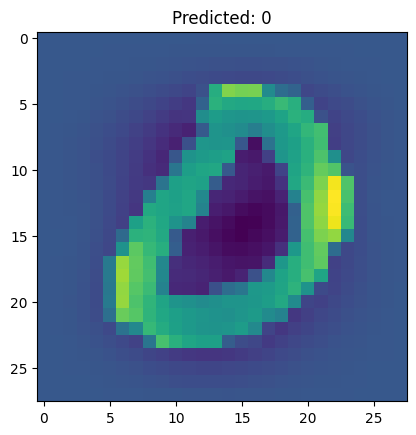

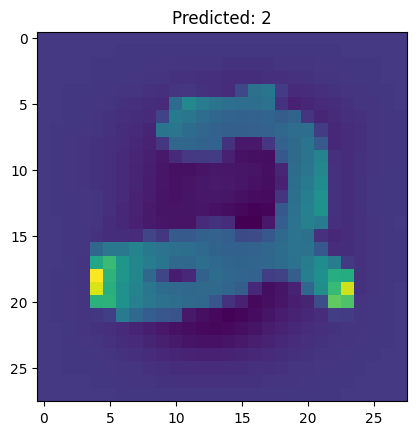

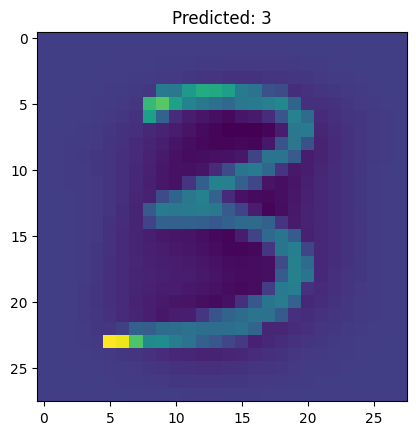

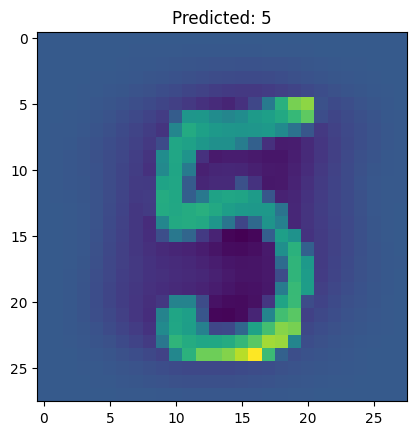

In [31]:
df_test = pd.read_csv("test.csv", nrows=15) # For demonstrative purposes, limiting the rows read to speed up the process
X_testing = df_test.values
X_testing = scaler.transform(X_testing)
y_test_pred = model.predict(X_testing) 
random_arr = [random.randint(0, len(df_test)-1) for _ in range(10)] # Visualizing 10 test samples, manually checking the accuracy of prediction
# We resize the 784 columns row to a 28x28 grid to visualize the digit 
for i in random_arr:         
    image = np.reshape(X_testing[i], (28, 28))
    plt.title(f'Predicted: {y_test_pred[i]}')
    plt.imshow(image) 
    plt.show()

In [ ]:
# Use GridSearchCV to get the best parameters for our svm model that lead to increased accuracy

grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['poly', 'rbf']
}  

grid_model = GridSearchCV(estimator=SVC(), param_grid=grid, verbose=2)
grid_model.fit(X_train, y_train)

In [ ]:
# Optional: try improving the accuracy of our current svm model by employing an ensemble of svm models.
ensemble_model = BaggingClassifier(model, bootstrap=True, n_jobs=-1, verbose=1).fit(X_train, y_train)
y_ensemble_pred = ensemble_model.predict(X_test)

print(accuracy_score(y_ensemble_pred, y_test))